In [55]:
import torch 
import torch.nn  as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt


device =torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [56]:
device

device(type='cuda')

In [57]:
input_size=784
hidden_size =100
num_classes=10
num_epoch=2
batch_size=100
learning_rate=0.001


#Mnist
train_dataset = torchvision.datasets.MNIST(root='./data',train=True,transform=transforms.ToTensor(),download=True)
test_dataset = torchvision.datasets.MNIST(root='./data',train=False,transform=transforms.ToTensor())


In [58]:
train_loader=torch.utils.data.DataLoader(dataset=train_dataset,batch_size=batch_size,shuffle=True)
test_loader=torch.utils.data.DataLoader(dataset=test_dataset,batch_size=batch_size)

In [59]:
examples=iter(train_loader)
smaples,lables=examples.next()

In [60]:
print(smaples.shape)
print(lables.shape)

torch.Size([100, 1, 28, 28])
torch.Size([100])


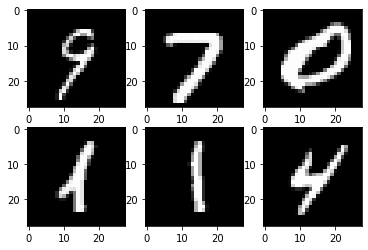

In [61]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(smaples[i][0],cmap='gray')

In [62]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet,self).__init__()
    self.l1=nn.Linear(input_size,hidden_size)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_size,num_classes)

  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out


In [63]:
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)  

# Train the model
n_total_steps = len(train_loader)
for epoch in range(5):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{5}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/5], Step [100/600], Loss: 0.4038
Epoch [1/5], Step [200/600], Loss: 0.3312
Epoch [1/5], Step [300/600], Loss: 0.3128
Epoch [1/5], Step [400/600], Loss: 0.2482
Epoch [1/5], Step [500/600], Loss: 0.2848
Epoch [1/5], Step [600/600], Loss: 0.2481
Epoch [2/5], Step [100/600], Loss: 0.1276
Epoch [2/5], Step [200/600], Loss: 0.1909
Epoch [2/5], Step [300/600], Loss: 0.2137
Epoch [2/5], Step [400/600], Loss: 0.1818
Epoch [2/5], Step [500/600], Loss: 0.0826
Epoch [2/5], Step [600/600], Loss: 0.0558
Epoch [3/5], Step [100/600], Loss: 0.1514
Epoch [3/5], Step [200/600], Loss: 0.1118
Epoch [3/5], Step [300/600], Loss: 0.0779
Epoch [3/5], Step [400/600], Loss: 0.1793
Epoch [3/5], Step [500/600], Loss: 0.1547
Epoch [3/5], Step [600/600], Loss: 0.0661
Epoch [4/5], Step [100/600], Loss: 0.0770
Epoch [4/5], Step [200/600], Loss: 0.1142
Epoch [4/5], Step [300/600], Loss: 0.1258
Epoch [4/5], Step [400/600], Loss: 0.0726
Epoch [4/5], Step [500/600], Loss: 0.0588
Epoch [4/5], Step [600/600], Loss: